# Tutorial on Quantum Programming: An Introduction

### Now: <br/>1/3 Motivation: Why Quantum Computing?
### Later today: <br/>2/3 Elements of Quantum Programming<br/> 3/3 Solving Problems with Quantum Programs

### Abraham Asfaw (@abe_asfaw), IBM Quantum

# Problem: How would you find the marked number in this box?

<br/>
<center><img src='./ieeeqw2020-abe-asfaw-talk-dependencies/images/box.png'></center>

# Problem: How would you find the marked number in this box?

<br/>
<center><img src='./ieeeqw2020-abe-asfaw-talk-dependencies/images/box-empty.png'></center>

### You can ask the box, "Is this it?" and specify a number. The box will say True only when your specified number matches the marked number. Otherwise, it says False.

In [1]:
import numpy as np
import matplotlib.pyplot as plotter

import sys
sys.path.append("ieeeqw2020-abe-asfaw-talk-dependencies/")

import warnings
warnings.filterwarnings('ignore')

In [2]:
from marked_number_boxes import classical_box

In [3]:
my_box = classical_box(100, print_self = True)

This is a classical box containing the marked number 40.


In [4]:
my_box.is_this_it(72)

False

In [5]:
max_number = 100
my_box = classical_box(max_number)

for x in range(1, max_number+1):
    if my_box.is_this_it(x) == True:
        print(f"Found it! The number was {x}.")
        print(f"I needed {my_box.how_many_times_invoked()} iterations.")
        break

Found it! The number was 49.
I needed 49 iterations.


In [6]:
max_number = 100
my_box = classical_box(max_number)

possible_numbers = np.arange(1, max_number+1, dtype=int)
np.random.shuffle(possible_numbers)

for x in possible_numbers:
    if my_box.is_this_it(x) == True:
        print(f"Found it! The number was {x}.")
        print(f"I needed {my_box.how_many_times_invoked()} iterations.")
        break

Found it! The number was 92.
I needed 95 iterations.


In [7]:
def one_by_one_strategy(max_number):

    my_box = classical_box(max_number)

    for x in range(1, max_number+1):
        if my_box.is_this_it(x) == True:
            return my_box.how_many_times_invoked()
        
def random_strategy(max_number):
    
    my_box = classical_box(max_number)

    possible_numbers = np.arange(1, max_number+1, dtype=int)
    np.random.shuffle(possible_numbers)

    for x in possible_numbers:
        if my_box.is_this_it(x) == True:
            return my_box.how_many_times_invoked()

In [8]:
one_by_one_strategy(100)

55

In [9]:
random_strategy(100)

11

In [10]:
max_number = 100

attempts_one_by_one = []
for _ in range(100000):
    attempts_one_by_one.append(
        one_by_one_strategy(max_number)
    )

In [11]:
max_number = 100

attempts_random = []
for _ in range(100000):
    attempts_random.append(
        random_strategy(max_number)
    )

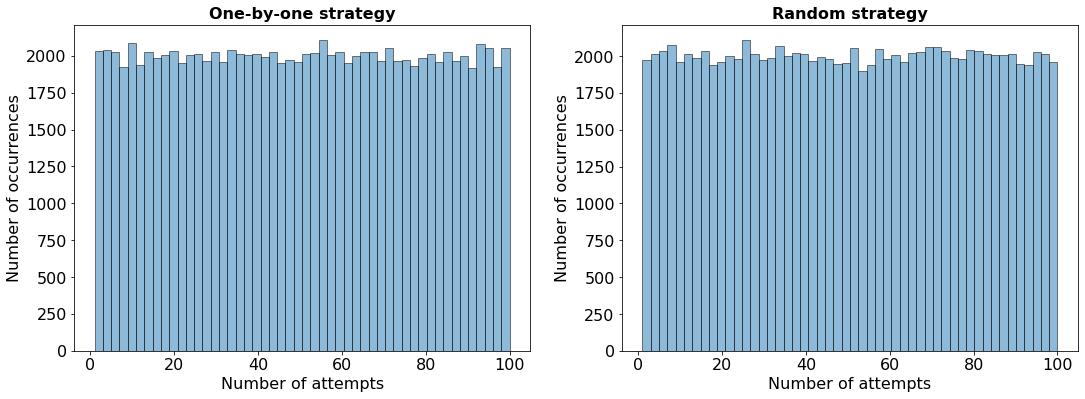

In [12]:
fig, [ax1, ax2] = plotter.subplots(nrows=1, ncols=2, figsize = (18,6))

ax1.hist(attempts_one_by_one, bins=50, ec='black', alpha=0.5)
ax1.set_xlabel('Number of attempts', fontsize=16)
plotter.setp(ax1.get_xticklabels(), fontsize=16)
ax1.set_ylabel('Number of occurrences', fontsize=16)
plotter.setp(ax1.get_yticklabels(), fontsize=16)
ax1.set_title('One-by-one strategy', fontsize=16, fontweight='bold')

ax2.hist(attempts_random, bins=50, ec='black', alpha=0.5)
ax2.set_xlabel('Number of attempts', fontsize=16)
plotter.setp(ax2.get_xticklabels(), fontsize=16)
ax2.set_ylabel('Number of occurrences', fontsize=16)
plotter.setp(ax2.get_yticklabels(), fontsize=16)
ax2.set_title('Random strategy', fontsize=16, fontweight='bold')

plotter.show()

In [13]:
max_numbers = [10, 100, 1000]

worst_case_one_by_one = []
for max_number in max_numbers:

    attempts_one_by_one = []
    for _ in range(1000):
        attempts_one_by_one.append(one_by_one_strategy(max_number))
        
    worst_case_one_by_one.append(max(attempts_one_by_one))

In [14]:
worst_case_random = []
for max_number in max_numbers:

    attempts_random = []
    for _ in range(1000):
        attempts_random.append(random_strategy(max_number))
        
    worst_case_random.append(max(attempts_random))

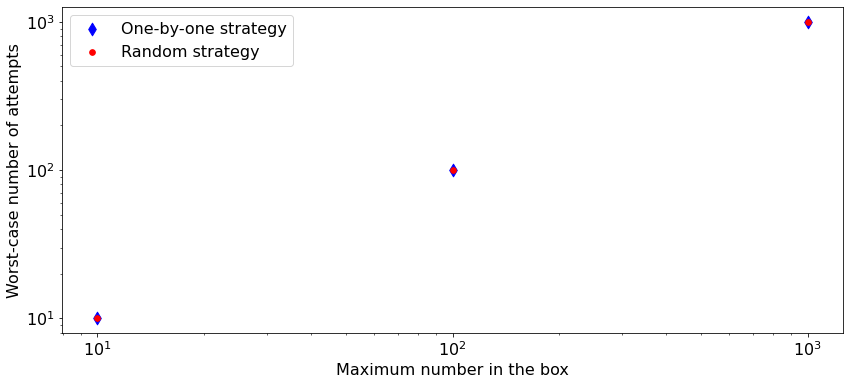

In [15]:
fig, ax = plotter.subplots(1,1, figsize = (14,6))
ax.scatter(max_numbers, worst_case_one_by_one, marker = 'd', color='blue', s=80)
ax.scatter(max_numbers, worst_case_random, color='red', s=32)

ax.set_yscale('log'); ax.set_xscale('log')
ax.set_xlabel('Maximum number in the box', fontsize=16)
ax.set_ylabel('Worst-case number of attempts', fontsize=16)
ax.legend(['One-by-one strategy', 'Random strategy'], fontsize=16)
plotter.setp(ax.get_yticklabels(), fontsize=16)
plotter.setp(ax.get_xticklabels(), fontsize=16)
plotter.show()

### Worst-case performance of both strategies is the same, and is proportional to the size of the problem. 

# The quantum version of this problem

In [16]:
from marked_number_boxes import quantum_box

In [17]:
max_number = 100
my_box = quantum_box(max_number, print_self = True)

This is a quantum box containing the marked number 90.


In [18]:
my_box.is_this_it(20)

False

In [19]:
my_box.how_many_times_invoked()

1

In [20]:
from marked_number_boxes import find_number_in_quantum_box

In [21]:
max_number = 100
my_box = quantum_box(max_number)
find_number_in_quantum_box(my_box, show_results=True)

Result 98 with probability 100.0%


In [22]:
my_box.how_many_times_invoked()

8

In [23]:
max_numbers = [10, 100, 1000]
worst_case_quantum = []

for max_number in max_numbers:
    my_box = quantum_box(max_number)
    find_number_in_quantum_box(my_box)
    number_of_attempts = my_box.how_many_times_invoked()
    print(f"Maximum number in box: {max_number}, number of attempts: {number_of_attempts}")
    
    worst_case_quantum.append(number_of_attempts)

Maximum number in box: 10, number of attempts: 3
Maximum number in box: 100, number of attempts: 8
Maximum number in box: 1000, number of attempts: 25


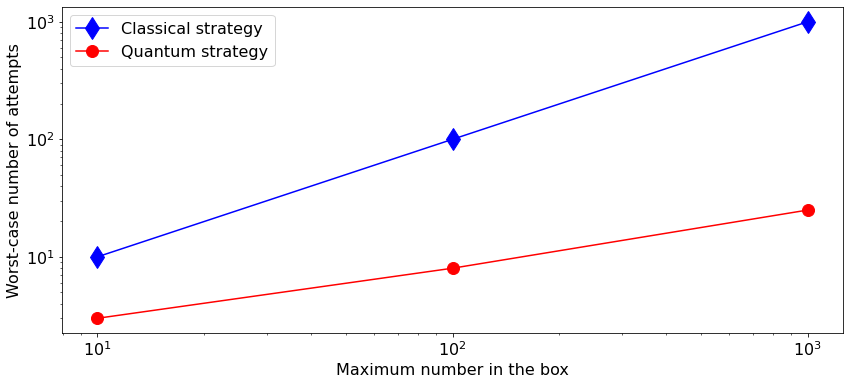

In [24]:
fig, ax = plotter.subplots(1,1, figsize = (14,6))
ax.plot(max_numbers, worst_case_random, marker = 'd', color='blue', markersize=16)
ax.plot(max_numbers, worst_case_quantum, marker = '.', color='red', markersize=24)

ax.set_yscale('log'); ax.set_xscale('log')
ax.set_xlabel('Maximum number in the box', fontsize=16)
ax.set_ylabel('Worst-case number of attempts', fontsize=16)
ax.legend(['Classical strategy', 'Quantum strategy'], fontsize=16)
plotter.setp(ax.get_yticklabels(), fontsize=16)
plotter.setp(ax.get_xticklabels(), fontsize=16)
plotter.show()

### Quantum programming allows us to reduce the worst-case number of attempts from exactly the size of the problem to ~square-root of the size of the problem.

# Running on a real quantum computer

In [25]:
max_number = 8
my_box = quantum_box(max_number, print_self = True)

This is a quantum box containing the marked number 6.


In [26]:
quantum_program = find_number_in_quantum_box(my_box)

In [27]:
from qiskit import IBMQ, execute
provider = IBMQ.load_account()
quantum_computer = provider.get_backend('ibmq_valencia')
job = execute(quantum_program, backend=quantum_computer, optimization_level=3, shots=8192)

from qiskit.tools.monitor import job_monitor
job_monitor(job)
counts = job.result().get_counts()

Job Status: job has successfully run


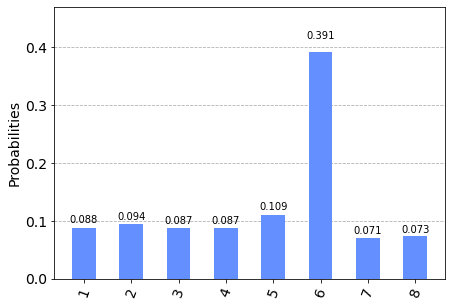

In [28]:
plot_counts = {}
for count in counts:
    plot_counts[int(count, 2) + 1] = counts[count]
    
from qiskit.visualization import plot_histogram
plot_histogram(plot_counts)

# Motivation: Why Quantum Computing?

- Potential speedup on problems that exist today using quantum programming
  - Here, saw the application of quantum programming for unstructured search to get square-root speedup
  - Factoring numbers into primes has been shown to have ~exponential speedup on a quantum computer

- Solutions to problems that are too challenging to solve today
  - Examples include chemical simulations, physics problems, and likely many undiscovered applications